In [1]:
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import datetime



In [23]:
# Load the dataset from a CSV file named "data.csv" into a DataFrame
# This allows for data manipulation and analysis using pandas
df= pd.read_csv("data.csv")

In [3]:
print(df.shape)
print(df.head(5))

(569, 33)
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  

In [5]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix
from sklearn.preprocessing import LabelEncoder

- Replace any missing values in the DataFrame `df2` with the string '0'.
- This ensures that there are no NaN values, which can be important for data processing and analysis.

In [6]:
df2=df[:]
del df2['Unnamed: 32']
df2 = df2.fillna('0')

- **Label Encoding**: This process converts categorical labels into numerical values. In this case, it transforms the 'diagnosis' column into a numerical format, which is essential for machine learning algorithms that require numerical input.
  
- **Why Label Encoder?**: For a multi-class classification problem like distinguishing between benign and malignant cases, label encoding is used to convert these categories into a format that can be easily processed by algorithms. It assigns a unique integer to each category.

- **One-Hot Encoding**: Unlike label encoding, one-hot encoding creates binary columns for each category, which can be more suitable for algorithms that might misinterpret numerical labels as ordinal. However, for binary classification or when the algorithm can handle integer labels, label encoding is often sufficient.

- **Code Explanation**:
  - `le=LabelEncoder()`: Initializes the label encoder.
  - `df2['label']= le.fit_transform(df2['diagnosis'])`: Transforms the 'diagnosis' column into numerical labels and stores it in a new column 'label'.
  - `le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))`: Creates a dictionary mapping the original class names to their corresponding numerical labels for reference.
  - `print(le_name_mapping)`: Displays the mapping of class names to numerical labels.

In [7]:
le=LabelEncoder()
df2['label']= le.fit_transform(df2['diagnosis'])

In [8]:
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_))) 
print(le_name_mapping)

{'B': 0, 'M': 1}


In [9]:
newData=df2[:]

In [10]:
newData.head(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,label
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1


- **Target Variable Extraction**: 
  - `Y = newData['label']`: Extracts the 'label' column from `newData`, which contains the target variable for prediction (e.g., benign or malignant).

- **Feature Preparation**:
  - `del newData['label']`: Removes the 'label' column from `newData` to prevent data leakage during model training.
  - `del newData['diagnosis']`: Removes the 'diagnosis' column, as it is redundant after encoding and not needed for model input.
  - `X = newData[:]`: Copies the remaining features into `X`, which will be used as input for machine learning models.

- **Data Preparation for Model Application**:
  - `Z = X.copy()`: Creates a copy of `X` to ensure the original feature set remains unchanged.
  - `Z['label'] = Y`: Adds the 'label' column back to `Z`, preparing a complete dataset with features and target variable for model evaluation or further processing.

- **Significance**: 
  - The 'label' column is crucial as it contains the outcome to be predicted by machine learning algorithms. This setup ensures that the models are trained on features (`X`) and evaluated against the true labels (`Y`).

In [11]:
Y = newData['label']
del newData['label']
del newData['diagnosis']
X=newData[:]


Z = X.copy()
Z['label'] = Y

In [12]:
X.head(3)

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [13]:
Y.head(3)

0    1
1    1
2    1
Name: label, dtype: int32

In [14]:
Z.head(3)

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,label
0,842302,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,842517,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,84300903,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1


- **Purpose of Train-Test Split**:
  - **Model Training**: The training set is used to fit the machine learning model, allowing it to learn patterns and relationships within the data.
  
  - **Model Evaluation**: The test set provides a separate dataset to evaluate the model's performance, ensuring that the model's predictions are not biased by the data it was trained on.

- **Generalization**: By evaluating the model on unseen data, we can assess how well it generalizes to new, real-world data, which is crucial for reliable predictions.

- **Avoiding Overfitting**: Splitting the data helps in detecting overfitting, where a model performs well on training data but poorly on new data. A good train-test split helps ensure the model is robust and not just memorizing the training data.

- **Reproducibility and Fairness**: Using parameters like `random_state` ensures that the split is reproducible, and using `stratify` (if applicable) maintains class distribution, providing a fair evaluation of model performance across different classes.

- **Data Splitting for Model Training and Evaluation**:
  - `train_test_split(X, Y, test_size=0.2, random_state=241)`: Splits the dataset into training and testing sets.
  
- **Parameters**:
  - `X`: Feature set used for training the model.
  - `Y`: Target variable containing the labels to be predicted.
  - `test_size=0.2`: Allocates 20% of the data for testing, ensuring the model's performance is evaluated on unseen data.
  - `random_state=241`: Sets a seed for reproducibility, ensuring the same split is obtained each time the code is run.
  - `stratify=Y` (commented out): If used, ensures that the split maintains the same proportion of classes in both training and testing sets, which is important for imbalanced datasets.

- **Output**:
  - `train_X`, `test_X`: Feature sets for training and testing.
  - `train_Y`, `test_Y`: Corresponding labels for training and testing.

- **Significance**: 
  - This split allows for effective training of the model on one portion of the data while evaluating its performance on a separate, unseen portion, helping to assess its generalization capability.

In [15]:
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.2, random_state=241)#, stratify=Y)

- **Model Training and Testing**:
  - **Training**: Involves fitting a machine learning model to the training data, allowing it to learn patterns and relationships. This step is crucial for the model to make accurate predictions.
  - **Testing**: Evaluates the model's performance on unseen data (test set) to ensure it generalizes well and is not overfitting to the training data.

- **K-Fold Cross Validation**:
  - **Concept**: K-Fold Cross Validation is a technique to assess the performance of a model by dividing the dataset into 'k' equal parts (folds). The model is trained on 'k-1' folds and tested on the remaining fold. This process is repeated 'k' times, with each fold serving as the test set once.
  - **Significance**: Provides a more reliable estimate of model performance by using all data points for both training and testing, reducing variance and avoiding overfitting.

- **Code Explanation**:
  - `categorical_features_indices = np.where(X.dtypes != np.float64)[0]`: Identifies indices of categorical features, which may require special handling in some models.
  
  - `kfold = KFold(n_splits=10)`: Initializes K-Fold cross-validation with 10 splits, meaning the data will be divided into 10 parts for validation.

  - **Model Evaluation Loop**:
    - `classifiers` and `models`: Lists of classifier names and corresponding model instances to be evaluated.
    - The loop iterates over each model, performing cross-validation:
      - `cross_val_score`: Computes accuracy scores for each fold.
      - `xyz.append(cv_result.mean())`: Stores the mean accuracy across all folds.
      - `std.append(cv_result.std())`: Stores the standard deviation of the accuracy scores, indicating variability.
      - `accuracy.append(cv_result)`: Collects all accuracy scores for further analysis.
      - `print(cv_result)`: Outputs the accuracy scores for each model.

  - `new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)`: Creates a DataFrame summarizing the mean and standard deviation of cross-validation scores for each classifier.

- **Outcome**: This process helps in selecting the best-performing model by comparing their cross-validated accuracies, ensuring robust model selection.


In [16]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
import lightgbm as lg
from catboost import CatBoostClassifier

categorical_features_indices = np.where(X.dtypes != np.float64)[0] 


kfold = KFold(n_splits=10) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=[ 'CatBoost', 'Logistic Regression','KNN','Decision Tree','Random Forest' ]
models=[CatBoostClassifier(verbose=False), LogisticRegression(),KNeighborsClassifier(n_neighbors=7),DecisionTreeClassifier(),RandomForestClassifier(n_estimators=900)]

for i in models:
    print("Currently Running" + str(i))
    model = i
    cv_result = cross_val_score(model,X,Y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
    print(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2


Currently Running<catboost.core.CatBoostClassifier object at 0x0000027A3D2D6000>
[0.94736842 0.92982456 0.94736842 0.98245614 0.98245614 0.98245614
 0.98245614 0.98245614 0.98245614 0.98214286]
Currently RunningLogisticRegression()
[0.85964912 0.9122807  0.92982456 0.75438596 0.96491228 0.94736842
 0.89473684 0.98245614 0.87719298 0.89285714]
Currently RunningKNeighborsClassifier(n_neighbors=7)
[0.36842105 0.63157895 0.54385965 0.54385965 0.43859649 0.57894737
 0.59649123 0.75438596 0.77192982 0.78571429]
Currently RunningDecisionTreeClassifier()
[0.87719298 0.9122807  0.85964912 0.94736842 0.92982456 0.94736842
 0.89473684 0.94736842 0.98245614 0.94642857]
Currently RunningRandomForestClassifier(n_estimators=900)
[0.92982456 0.92982456 0.92982456 0.98245614 0.98245614 0.98245614
 0.96491228 0.96491228 0.96491228 0.98214286]


,CV Mean,Std
CatBoost,0.970144,0.019279
Logistic Regression,0.901566,0.061403
KNN,0.601378,0.132402
Decision Tree,0.924467,0.035939
Random Forest,0.961372,0.021882


- **Visualization of Model Performance**:
  - Plots a horizontal bar chart of the average cross-validation mean accuracy for each model, providing a visual comparison of their performance.
  - The chart is titled 'Average CV Mean Accuracy' and is resized for better readability, helping to quickly identify the most accurate models.

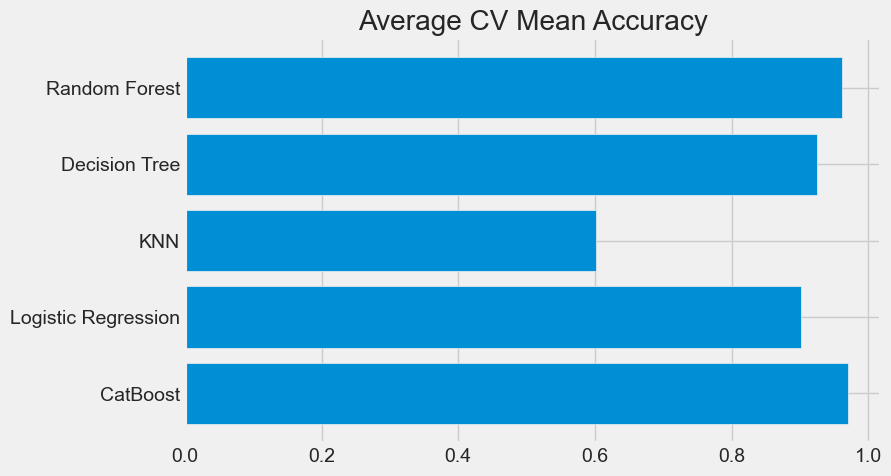

In [17]:

new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

- **Purpose and Significance**:
  - **Model Evaluation**: This code evaluates the performance of different classifiers (Random Forest, Logistic Regression, Decision Tree, and CatBoost) using cross-validation.
  
  - **Confusion Matrices**: Visualizes confusion matrices for each model, providing insights into true vs. predicted classifications, which helps in understanding model accuracy and error types.

  - **Classification Reports**: Generates detailed classification reports, including precision, recall, and F1-score, offering a comprehensive view of each model's performance across different metrics.

- **Outcome**: This analysis aids in comparing models, identifying strengths and weaknesses, and selecting the most suitable model for the classification task.

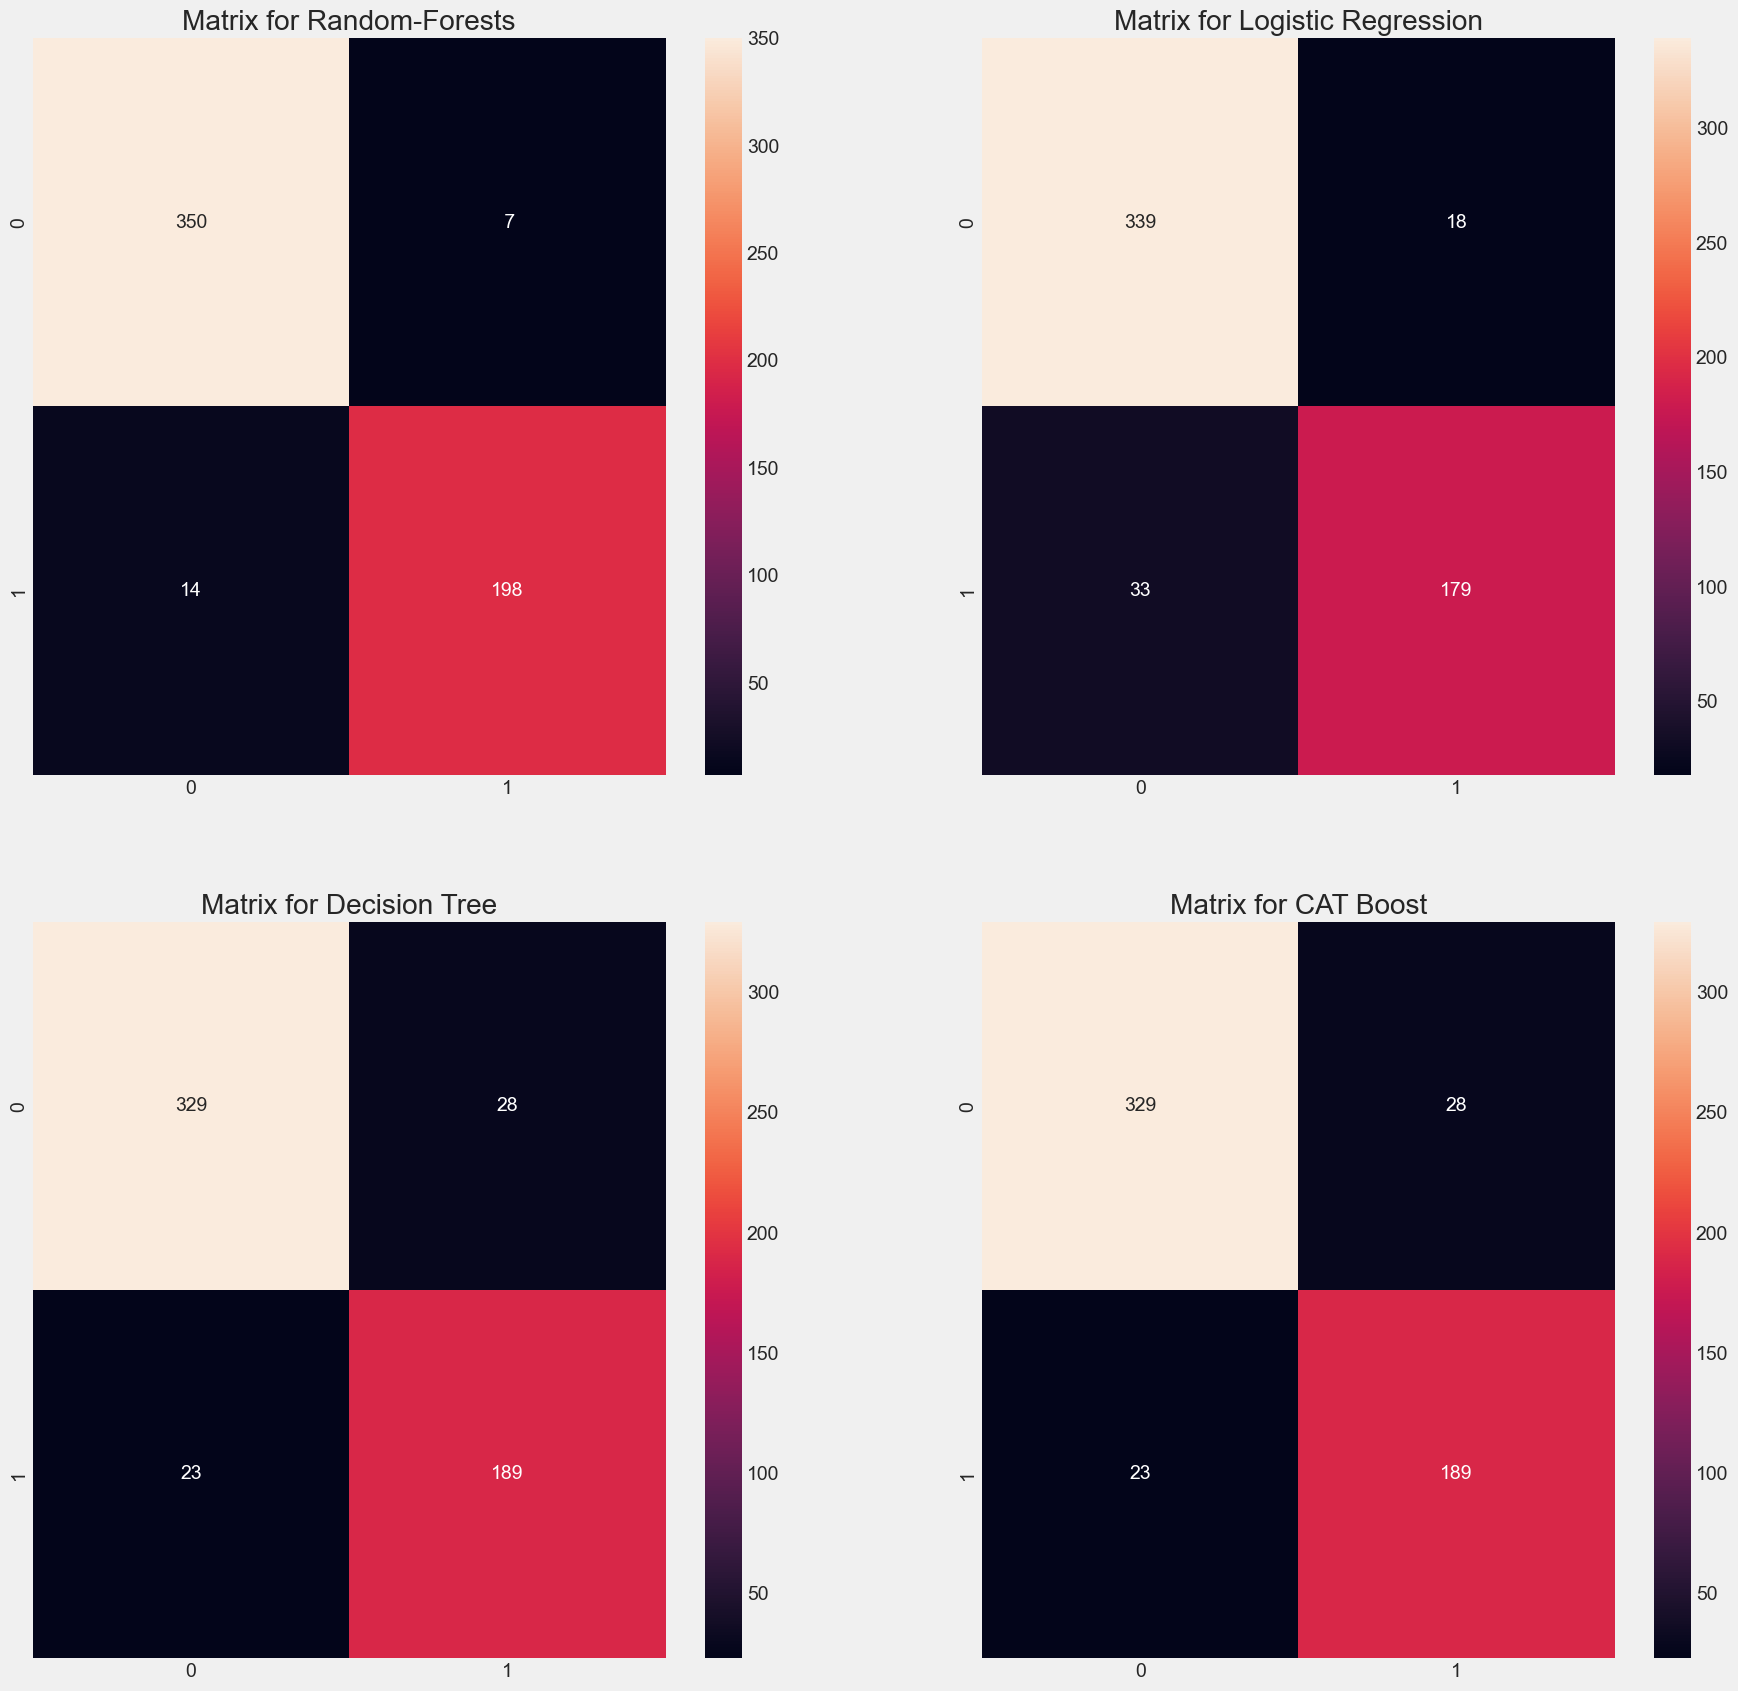

In [21]:
from sklearn.metrics import classification_report
#print(classification_report(Y, y_pred_Cat))


f,ax=plt.subplots(2,2,figsize=(20,20))



y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for Random-Forests')
RF_F1 = classification_report(Y, y_pred)

y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Logistic Regression')
LR_F1 = classification_report(Y, y_pred)

y_pred = cross_val_predict(DecisionTreeClassifier(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Decision Tree')
DT_F1 = classification_report(Y, y_pred)

plt.subplots_adjust(hspace=0.2,wspace=0.2)

ax[1,1].set_title('Matrix for CAT Boost')
y_pred_Cat = cross_val_predict(CatBoostClassifier(verbose=False),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
CAT_F1 = classification_report(Y, y_pred_Cat)


plt.show()

- **Classification Report**: A comprehensive summary of a model's performance, providing key metrics for each class in a classification problem.

- **Metrics Explained**:
  - **Precision**: The ratio of true positive predictions to the total predicted positives. It indicates how many of the predicted positive cases were actually positive.
    - **Formula**: Precision = TP / (TP + FP)
    - **Significance**: High precision means fewer false positives, which is crucial in scenarios where false alarms are costly.

  - **Recall (Sensitivity)**: The ratio of true positive predictions to the actual positives. It measures the model's ability to identify all relevant instances.
    - **Formula**: Recall = TP / (TP + FN)
    - **Significance**: High recall is important in cases where missing a positive case is critical, such as disease detection.

  - **F1 Score**: The harmonic mean of precision and recall, providing a balance between the two metrics.
    - **Formula**: F1 Score = 2 * (Precision * Recall) / (Precision + Recall)
    - **Significance**: Useful when there is an uneven class distribution, as it considers both false positives and false negatives.

  - **Accuracy**: The ratio of correctly predicted instances to the total instances.
    - **Formula**: Accuracy = (TP + TN) / (TP + TN + FP + FN)
    - **Significance**: Provides an overall measure of model performance but can be misleading in imbalanced datasets.

- **Importance**:
  - **Comprehensive Evaluation**: Offers a detailed view of model performance across different aspects, helping to identify strengths and weaknesses.
  - **Informed Decision-Making**: Enables better model selection and tuning by highlighting areas needing improvement.
  - **Balanced Assessment**: Especially important in imbalanced datasets where accuracy alone may not reflect true performance.

- **Use Cases**: Essential in applications like medical diagnosis, fraud detection, and any domain where understanding the trade-offs between false positives and false negatives is critical.

In [22]:
print("==========================================================================")
print("F1 For Random Forest")
print(RF_F1)
print("==========================================================================")
print("F1 For Logistic Regression")
print(LR_F1)
print("==========================================================================")
print("F1 For Decision Tree")
print(DT_F1)
print("==========================================================================")
print("F1 For CatBoost")
print(CAT_F1)
print("==========================================================================")

F1 For Random Forest
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       357
           1       0.97      0.93      0.95       212

    accuracy                           0.96       569
   macro avg       0.96      0.96      0.96       569
weighted avg       0.96      0.96      0.96       569

F1 For Logistic Regression
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       357
           1       0.91      0.84      0.88       212

    accuracy                           0.91       569
   macro avg       0.91      0.90      0.90       569
weighted avg       0.91      0.91      0.91       569

F1 For Decision Tree
              precision    recall  f1-score   support

           0       0.93      0.92      0.93       357
           1       0.87      0.89      0.88       212

    accuracy                           0.91       569
   macro avg       0.90      0.91      0.90       569
weigh

- **Overall Performance**:
  - All models demonstrate strong performance, with accuracy scores ranging from 0.91 to 0.97. CatBoost and Random Forest show the highest accuracy at 0.97 and 0.96, respectively.

- **Precision and Recall**:
  - **Random Forest**: High precision (0.96) and recall (0.98) for class 0, and slightly lower recall (0.93) for class 1, indicating it effectively identifies most positive cases with few false positives.
  - **Logistic Regression**: Balanced precision (0.91) for both classes, but lower recall (0.84) for class 1, suggesting it misses some positive cases.
  - **Decision Tree**: Good precision and recall for class 0, but slightly lower recall (0.89) for class 1, similar to Logistic Regression.
  - **CatBoost**: Excellent precision (0.99) and recall (0.94) for class 1, indicating it captures almost all positive cases with minimal false positives.

- **F1 Score**:
  - **CatBoost**: Highest F1 score (0.98 for class 0 and 0.96 for class 1), indicating a strong balance between precision and recall.
  - **Random Forest**: Also performs well with F1 scores of 0.97 and 0.95, making it a reliable choice.
  - **Logistic Regression and Decision Tree**: Lower F1 scores, particularly for class 1, suggesting room for improvement in capturing positive cases.

- **Conclusion**:
  - **CatBoost** emerges as the top performer, offering the best balance of precision, recall, and F1 score, making it highly effective for this classification task.
  - **Random Forest** is a close second, providing robust performance with slightly lower recall for class 1.
  - **Logistic Regression and Decision Tree** are less effective, particularly in identifying positive cases, and may require further tuning or feature engineering.